# Описание проекта

В данной работе я создала модель машинного обучения, которая предсказывает коэффициент восстановления золота из золотосодержащей руды.

В процессе реализации применялись методы кросс-валидации, модели случайного леса и линейной регрессии,визуализация данных с помощью библиотек *matplotlib*, *seaborn*, построение моделей с помощью *sklearn.*


# 1. Подготовка данных

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import defaultdict

In [66]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
                    
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
                   
train.shape, test.shape, full.shape

((16860, 86), (5856, 52), (22716, 86))

In [67]:
train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [68]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [69]:
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [70]:
for data in train, test, full:
    info = data.info()
    print(info)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [71]:
for data in train, test, full:
    describe = data.describe()
    print(describe)

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.939185                    4

In [72]:
#проверим подсчет recovery
train['rough_recovery'] = ((train['rougher.output.concentrate_au'] 
                              * (train['rougher.input.feed_au'] - 
                                 train['rougher.output.tail_au']))/(train['rougher.input.feed_au'] *
                                                        (train['rougher.output.concentrate_au'] - 
                                                        train['rougher.output.tail_au'])+0.000001)) * 100

In [73]:
train['rough_recovery']

date
2016-01-15 00:00:00    87.107762
2016-01-15 01:00:00    86.843260
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226429
2016-01-15 04:00:00    86.688793
                         ...    
2018-08-18 06:59:59    89.574375
2018-08-18 07:59:59    87.724006
2018-08-18 08:59:59    88.890577
2018-08-18 09:59:59    89.858125
2018-08-18 10:59:59    89.514959
Name: rough_recovery, Length: 16860, dtype: float64

In [74]:
train[['rough_recovery','rougher.output.recovery']].describe()

,rough_recovery,rougher.output.recovery
count,1.461000e+04,14287.000000
mean,-7.748550e+06,82.394201
std,1.937667e+08,15.096808
min,-7.570591e+09,0.000000
25%,7.958832e+01,79.818372
50%,8.519551e+01,85.235997
75%,9.018499e+01,90.131691
max,1.380257e+04,100.000000


In [75]:
train_drop = train.dropna()
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant                      11017 non-null float64
primary_c

Походу, просто удалить пропуски не очень хорошая идея, так как в таком случае потеряем треть датасета. Надо изучить подробнее что с этим всем делать, вычислить MAE.

In [76]:
train_drop['difference'] = train_drop['rougher.output.recovery'] - train_drop['rough_recovery']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
mean_absolute_error(train_drop['rougher.output.recovery'], train_drop['rough_recovery'])

3.984989910222653e-06

In [78]:
train_drop.query('difference != 0')[['rough_recovery','rougher.output.recovery']]

,rough_recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107762,87.107763
2016-01-15 01:00:00,86.843260,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226429,87.226430
2016-01-15 04:00:00,86.688793,86.688794
...,...,...
2018-08-18 06:59:59,89.574375,89.574376
2018-08-18 07:59:59,87.724006,87.724007
2018-08-18 08:59:59,88.890577,88.890579


Вроде значения исходные и рассчитанные совпадают почти полностью, не считая далеких долей, это можно не учитывать.

In [79]:
columns_test = test.columns.tolist()
columns_train = train.columns.tolist()

In [80]:
for col in columns_train:
    if col not in columns_test:
        print(col)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Теперь нужно заполнить пустые данные в тренировочной выборке данными из полной. Если и в полной выборке в итоге есть пропуски, то мы их дропаем все, но все равно уже это будет существенно меньшее количесво удалений, чем если бы просто удалили без заполнений из полных данных.

In [81]:
train_test = train.fillna(full)
train.isna().sum()

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
rough_recovery                                2250
Length: 87, dtype: int64

In [82]:
train[train['secondary_cleaner.state.floatbank6_a_level'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.95976,2.064173,15.139256,3.091437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.217221
2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-20 10:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 11:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-21 23:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
train_test[train_test['secondary_cleaner.state.floatbank6_a_level'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.95976,2.064173,15.139256,3.091437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.217221
2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-20 10:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 11:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-21 23:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
train = train.fillna(full)

In [85]:
train['final.output.recovery'].isna().sum()

1521

In [86]:
train.dropna(subset = ['final.output.recovery'], inplace=True)

In [87]:
train['final.output.recovery'].isna().sum()

0

In [88]:
train.dropna(subset = ['rougher.output.recovery'], inplace=True)

In [89]:
train['rougher.output.recovery'].isna().sum()

0

In [90]:
train[['final.output.recovery', 'rougher.output.recovery']].describe()

,final.output.recovery,rougher.output.recovery
count,14149.000000,14149.000000
mean,66.518832,82.704502
std,10.295402,14.479156
min,0.000000,0.000000
25%,62.545817,79.993067
50%,67.432775,85.299462
75%,72.346428,90.165021
max,100.000000,100.000000


In [91]:
train = train.fillna(method = 'ffill')
test = test.fillna(method = 'ffill')

In [92]:
train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rough_recovery                                0
Length: 87, dtype: int64

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant                      14149 non-null float64
primary_c

In [94]:
train = train.reset_index(drop=True)

Все пропуски удалены, данные выглядят как надо. Теперь изучим что у нас с тестовой выборкой.

In [95]:
test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [96]:
test = test.merge(full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [97]:
print(train.duplicated().sum(), test.duplicated().sum(), full.duplicated().sum())

0 8 22


В обучающей выборке дублей нет, зато есть в тестовой и полной, удалим их оттуда.

In [98]:
train = train.drop_duplicates()
test = test.drop_duplicates()
full = full.drop_duplicates()
print(train.duplicated().sum(), test.duplicated().sum(), full.duplicated().sum())

0 0 0


In [99]:
test.dropna(subset = ['rougher.output.recovery'], inplace=True)
test.dropna(subset = ['final.output.recovery'], inplace=True)

# 2. Анализ данных

Исследуем, как менялась концентрация ценных металлов на разных этапах очистки:

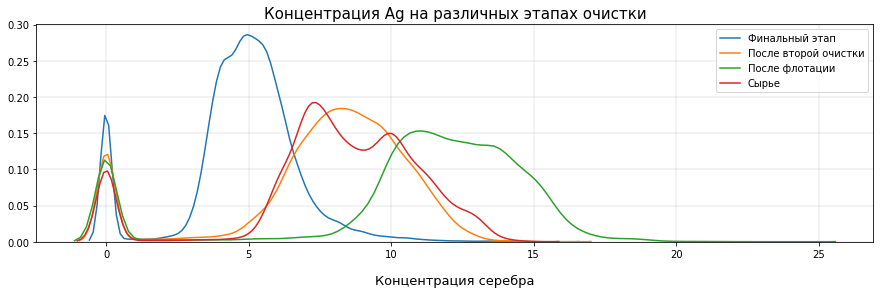

In [100]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Ag на различных этапах очистки', fontsize=15)
plt.xlabel('Концентрация серебра', labelpad=15, fontsize=13)
sns.kdeplot(data=full['final.output.concentrate_ag'], label = 'Финальный этап')
sns.kdeplot(data=full['primary_cleaner.output.concentrate_ag'], label = 'После второй очистки')
sns.kdeplot(data=full['rougher.output.concentrate_ag'], label = 'После флотации')
sns.kdeplot(data=full['rougher.input.feed_ag'], label = 'Сырье')
plt.grid(which='major',
        color = 'k', 
        linewidth = 0.1)

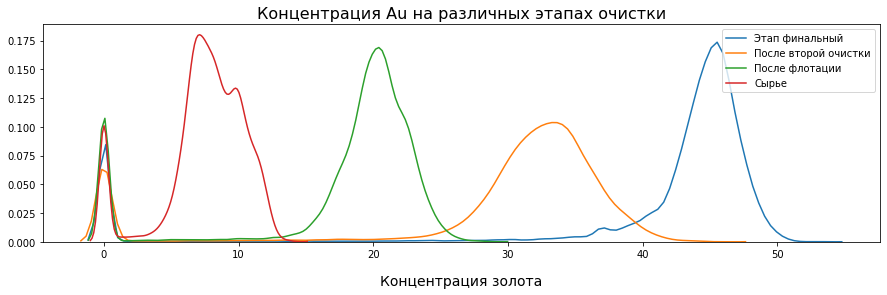

In [101]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Au на различных этапах очистки', fontsize=16)
plt.xlabel('Концентрация золота', labelpad=15, fontsize=14)
sns.kdeplot(data=full['final.output.concentrate_au'], label = 'Этап финальный')
sns.kdeplot(data=full['primary_cleaner.output.concentrate_au'], label = 'После второй очистки')
sns.kdeplot(data=full['rougher.output.concentrate_au'], label = 'После флотации')
sns.kdeplot(data=full['rougher.input.feed_au'], label = 'Сырье')

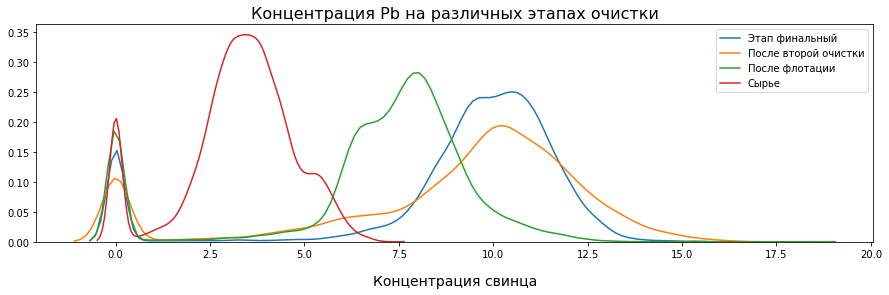

In [102]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Pb на различных этапах очистки', fontsize=16)
plt.xlabel('Концентрация свинца', labelpad=15, fontsize=14)
sns.kdeplot(data=full['final.output.concentrate_pb'], label = 'Этап финальный')
sns.kdeplot(data=full['primary_cleaner.output.concentrate_pb'], label = 'После второй очистки')
sns.kdeplot(data=full['rougher.output.concentrate_pb'], label = 'После флотации')
sns.kdeplot(data=full['rougher.input.feed_pb'], label = 'Сырье')

Видно по первому графику, что с каждой очисткой доля серебра уменьшается, при этом доля золота в концентрате повышается с каждым этапом. Доля свинца после флотации увеличивается. После этого остается такой же, или немного увеличивается.

Далее сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

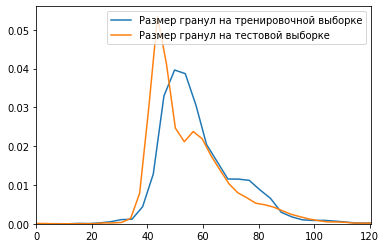

In [103]:
plt.xlim(0, train['rougher.input.feed_size'].mean() + train['rougher.input.feed_size'].mean())
sns.kdeplot(data=train['rougher.input.feed_size'], label = 'Размер гранул на тренировочной выборке')
sns.kdeplot(data=test['rougher.input.feed_size'], label = 'Размер гранул на тестовой выборке')

Распределения не очень сильно отличаются, значит оценка модели должна быть верной

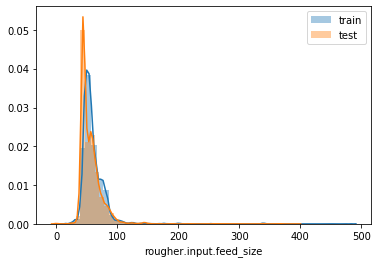

In [104]:
sns.distplot(train['rougher.input.feed_size'].dropna(), label='train')
sns.distplot(test['rougher.input.feed_size'].dropna(), label='test')
plt.legend()

Исследуем суммарную концерацию целевых веществ в разных стадиях обработки в обучающей и тестовой выблрках:

In [105]:
full['rougher.input.sum'] = (full['rougher.input.feed_ag'] + full['rougher.input.feed_au'] 
                                  + full['rougher.input.feed_pb'] + full['rougher.input.feed_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
full['rougher.output.sum'] = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_au']
                                  + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
full['primary.output.sum'] = (full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_au']
                                  + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
full['final.output.sum'] = (full['final.output.concentrate_ag'] + full['final.output.concentrate_au']
                                  + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


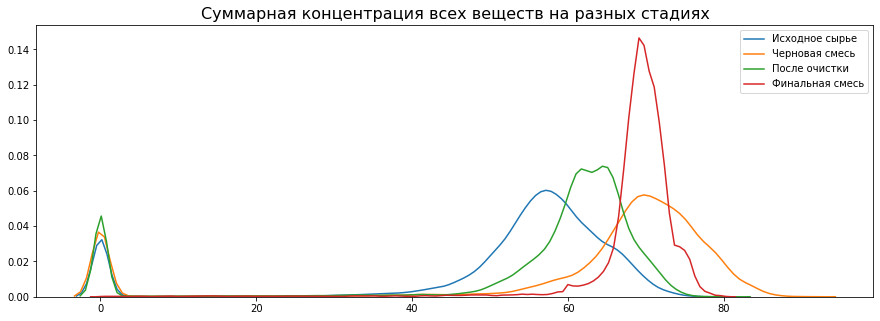

In [109]:
plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=16)
sns.kdeplot(data=full['rougher.input.sum'], label = 'Исходное сырье')
sns.kdeplot(data=full['rougher.output.sum'], label = 'Черновая смесь')
sns.kdeplot(data=full['primary.output.sum'], label = 'После очистки')
sns.kdeplot(data=full['final.output.sum'], label = 'Финальная смесь')

Построим ящики с усами суммарных концентраций веществ, чтобы увидеть распределения этих значений.

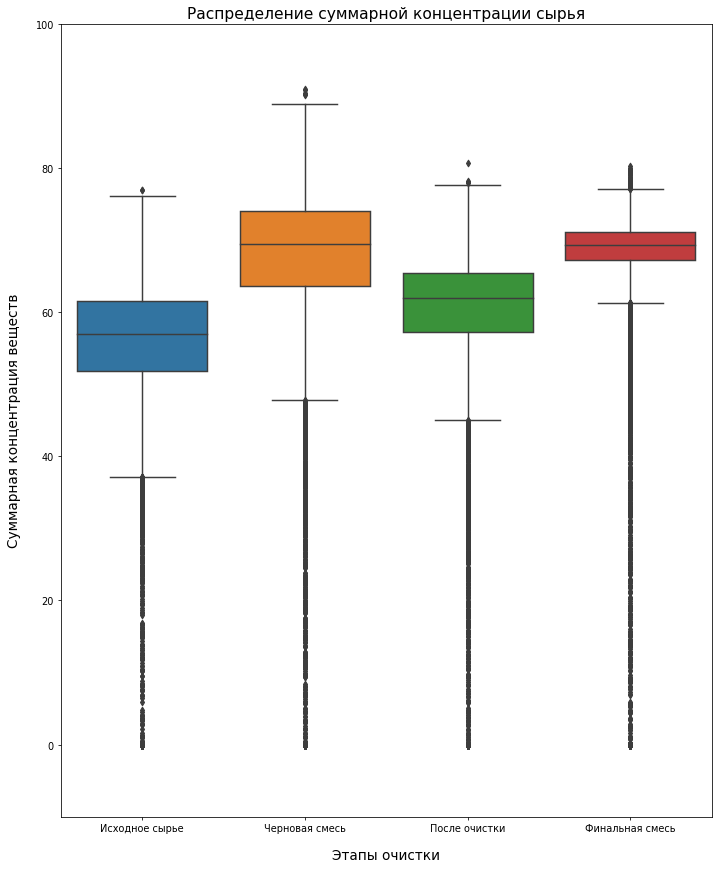

In [110]:
plt.figure(figsize=(12,15), dpi= 70)
sns.boxplot(data=full[['rougher.input.sum', 'rougher.output.sum', 'primary.output.sum', 'final.output.sum']])
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-10, 100)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация веществ', labelpad=15, fontsize=14)
plt.xticks(np.arange(4), ('Исходное сырье', 'Черновая смесь', 'После очистки', 'Финальная смесь'))
plt.show()


Видим, что очень много выбросов находятся в первом квартиле, на всякий случай их лучше убрать из обучающей выборки, так как возможно будем обучать не только лес, а линейные модели не любят выбросы.

In [130]:
final_output_concentrate = (train['final.output.concentrate_ag'] + train['final.output.concentrate_au']
                                  + train['final.output.concentrate_pb'] + train['final.output.concentrate_sol'])

train_clean = train.query('@final_output_concentrate > 0')
#train_clean1 = train_clean

In [131]:
train_clean['final.output.sum'] = (train_clean['final.output.concentrate_ag'] + train_clean['final.output.concentrate_au']
                                  + train_clean['final.output.concentrate_pb'] + train_clean['final.output.concentrate_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


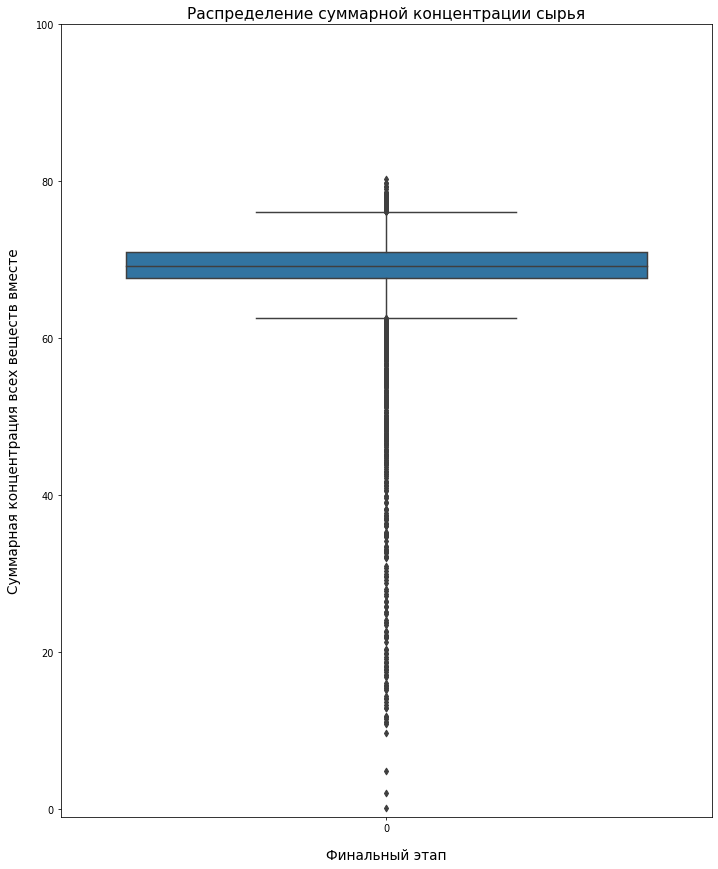

In [132]:
plt.figure(figsize=(12,15), dpi= 70)
sns.boxplot(data=train_clean['final.output.sum'])
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-1, 100)
plt.xlabel('Финальный этап', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация всех веществ вместе', labelpad=15, fontsize=14)
plt.show()

В целом теперь выбросов стало меньше, ящик с усами выглядит лучше,  даже можно было побольше убрать наверное...

# 3. Модель

Функция для вычисления итоговой sMAPE:

In [133]:
def smape(target, predictions):
    smape = 100/len(target) * np.sum(2* np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))
    return smape


In [134]:
def total_sMape(rougher, final):
    total_sMape = 0.25*rougher + 0.75*final
    return total_sMape

In [135]:
smape_score = make_scorer(smape)

In [136]:
#features_train = train_clean.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1)
features_train = train_clean[columns_test]
#features_train = train_clean.drop('rougher.output.recovery', axis=1)
features_test = test.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1)

target_train_final = train_clean['final.output.recovery']
target_train_rough = train_clean['rougher.output.recovery']
target_test_final = test['final.output.recovery']
target_test_rough = test['rougher.output.recovery']


In [137]:
features_test.shape, features_train.shape

((5290, 52), (14091, 52))

In [96]:
#модель случайного леса на флотации
for estim in range(80,101,10):
    for depth in range(8,11,2):
        model_r_forest = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=12345)
        smape_score_rough_forest_reg = cross_val_score(model_r_forest, features_train, target_train_rough, cv=5, scoring=smape_score)
        print('sMAPE =', smape_score_rough_forest_reg.mean(), 'при n_estimators =', estim, 'max_depth =',depth)

KeyboardInterrupt: 

In [ ]:
#модель случайного леса на финальном сырье
for estim in range(80,101,10):
    for depth in range(8,11,2):
        model_r_forest = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=12345)
        smape_score_final_forest_reg = cross_val_score(model_r_forest, features_train, target_train_final, cv=5, scoring=smape_score)
        print('sMAPE =', smape_score_final_forest_reg.mean(), 'при n_estimators =', estim, 'max_depth =',depth)

In [138]:
smape_final_forest = total_sMape(smape_score_final_forest_reg.mean(), smape_score_rough_forest_reg.mean())
print('sMAPE final RandomForestRegressor:', smape_final_forest)

NameError: name 'smape_score_final_forest_reg' is not defined

Оптимальные параметры для модели случайного леса это 90 и 10.
Проверим на тестовой выборке:

In [139]:
forest_model_rough = RandomForestRegressor(n_estimators=90, max_depth=10, random_state=12345)
forest_model_rough.fit(features_test, target_test_rough)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [140]:
features_test.shape, features_train.shape

((5290, 52), (14091, 52))

In [141]:
forest_model_final = RandomForestRegressor(n_estimators=90, max_depth=10, random_state=12345)
forest_model_final.fit(features_test, target_test_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [142]:
predict_forest_rough = forest_model_rough.predict(features_test)

In [143]:
predict_forest_final = forest_model_final.predict(features_test)

In [144]:
smape_rough_forest = smape(target_test_rough, predict_forest_rough)
smape_final_forest = smape(target_test_final, predict_forest_final)

In [145]:
smape_forest = total_sMape(smape_final_forest.mean(), smape_rough_forest.mean())
print('sMAPE модели RandomForestRegressor на тестовой выборке:', smape_forest)

sMAPE модели RandomForestRegressor на тестовой выборке: 5.756189373418085


Теперь протестируем линейную модель:

In [146]:
linear_model_rough = LinearRegression()
smape_score_rough_lin_reg = cross_val_score(linear_model_rough, features_train, target_train_rough, cv=5, scoring=smape_score)
print('sMAPE =', smape_score_rough_lin_reg.mean())

sMAPE = 12.760950966768513


In [147]:
linear_model_final = LinearRegression()
smape_score_final_lin_reg = cross_val_score(linear_model_final, features_train, target_train_final, cv=5, scoring=smape_score)
print('sMAPE =', smape_score_final_lin_reg.mean())

sMAPE = 10.976969248287684


In [148]:
smape_final_lin = total_sMape(smape_score_rough_lin_reg.mean(), smape_score_final_lin_reg.mean())
print('sMAPE final LinearRegression:', smape_final_lin)

sMAPE final LinearRegression: 11.42296467790789


Проверим модель на тестовой выборке:

In [149]:
linear_model_rough = LinearRegression()
linear_model_rough.fit(features_test, target_test_rough)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
linear_model_final.fit(features_test, target_test_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
predict_linear_rough = linear_model_rough.predict(features_test)


In [152]:
predict_linear_final = linear_model_final.predict(features_test)


In [153]:
smape_rough_linear = smape(target_test_rough, predict_linear_rough)
smape_final_linear = smape(target_test_final, predict_linear_final)

In [154]:
smape_linear_regr = total_sMape(smape_final_linear.mean(), smape_rough_linear.mean())
print('sMAPE модели Linear Regression на тестовой выборке:', smape_linear_regr)

sMAPE модели Linear Regression на тестовой выборке: 8.690618667255958


Проверим адекватность предположительно константной модели:

In [164]:
test['target_train_rough_mean'] = target_train_rough.mean()

test['target_train_rough_mean'].shape

(5290,)

In [165]:
test['target_train_final_mean'] = target_train_final.mean()

test['target_train_final_mean'].shape

(5290,)

In [171]:
smape_const = smape(test['target_train_rough_mean'], target_test_rough)*0.25 + smape(test['target_train_final_mean'], target_test_final)* 0.75
print( "SMAPE const : ", smape_const)

SMAPE const :  10.161769947316003


По сравнению с константной моделью показатели мы улучшили.

В итоге лучше всех себя показала деревянная модель,с результатом sMAPE на тестовой выборке 5.75, при показателе линейной модели 8.69. 